In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
downloaded = drive.CreateFile({'id':'1eGBZ0aDkq1brdGGT9mfCuYMFfbjUr9QE'}) 
downloaded.GetContentFile('INFY.NS.csv') 

In [ ]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('INFY.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-21,1188.000000,1209.750000,1152.050049,1177.300049,1154.499878,10858352
1,2020-12-22,1182.000000,1223.849976,1176.099976,1220.500000,1196.863159,10901851
2,2020-12-23,1238.000000,1258.849976,1230.550049,1253.050049,1228.782837,15878346
3,2020-12-24,1249.900024,1249.900024,1226.000000,1236.050049,1212.112061,7313885
4,2020-12-28,1238.449951,1248.000000,1236.000000,1240.300049,1216.279663,4607051
...,...,...,...,...,...,...,...
241,2021-12-13,1767.050049,1771.349976,1738.800049,1744.650024,1744.650024,4040584
242,2021-12-14,1730.900024,1763.000000,1710.349976,1752.150024,1752.150024,4768144
243,2021-12-15,1745.000000,1747.949951,1721.199951,1734.199951,1734.199951,3053149
244,2021-12-16,1762.650024,1777.599976,1758.000000,1771.599976,1771.599976,4481031


In [ ]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-21,1188.000000,1209.750000,1152.050049,1177.300049,1154.499878,10858352
2020-12-22,1182.000000,1223.849976,1176.099976,1220.500000,1196.863159,10901851
2020-12-23,1238.000000,1258.849976,1230.550049,1253.050049,1228.782837,15878346
2020-12-24,1249.900024,1249.900024,1226.000000,1236.050049,1212.112061,7313885
2020-12-28,1238.449951,1248.000000,1236.000000,1240.300049,1216.279663,4607051
...,...,...,...,...,...,...
2021-12-13,1767.050049,1771.349976,1738.800049,1744.650024,1744.650024,4040584
2021-12-14,1730.900024,1763.000000,1710.349976,1752.150024,1752.150024,4768144
2021-12-15,1745.000000,1747.949951,1721.199951,1734.199951,1734.199951,3053149


In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2020-12-21,10.699951,57.699951
2020-12-22,-38.500000,47.750000
2020-12-23,-15.050049,28.299927
2020-12-24,13.849975,23.900024
2020-12-28,-1.850098,12.000000


In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)


In [ ]:
df['Predicted_Signal'] = cls.predict(X)

In [ ]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [ ]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [ ]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2020-12-21,1188.000000,1209.750000,1152.050049,1177.300049,1154.499878,10858352,10.699951,57.699951,1,NaN,NaN,NaN,NaN
2020-12-22,1182.000000,1223.849976,1176.099976,1220.500000,1196.863159,10901851,-38.500000,47.750000,0,0.036694,0.036694,0.036694,0.036694
2020-12-23,1238.000000,1258.849976,1230.550049,1253.050049,1228.782837,15878346,-15.050049,28.299927,1,0.026669,0.000000,0.063364,0.036694
2020-12-24,1249.900024,1249.900024,1226.000000,1236.050049,1212.112061,7313885,13.849975,23.900024,1,-0.013567,-0.013567,0.049797,0.023127
2020-12-28,1238.449951,1248.000000,1236.000000,1240.300049,1216.279663,4607051,-1.850098,12.000000,1,0.003438,0.003438,0.053235,0.026566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,1767.050049,1771.349976,1738.800049,1744.650024,1744.650024,4040584,22.400025,32.549927,1,-0.008299,-0.008299,0.415010,0.433948
2021-12-14,1730.900024,1763.000000,1710.349976,1752.150024,1752.150024,4768144,-21.250000,52.650024,0,0.004299,0.004299,0.419308,0.438247
2021-12-15,1745.000000,1747.949951,1721.199951,1734.199951,1734.199951,3053149,10.800049,26.750000,1,-0.010245,-0.000000,0.409064,0.438247


In [ ]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2020-12-21,1188.000000,1209.750000,1152.050049,1177.300049,1154.499878,10858352,10.699951,57.699951,1,NaN,NaN,NaN,NaN
2020-12-22,1182.000000,1223.849976,1176.099976,1220.500000,1196.863159,10901851,-38.500000,47.750000,0,0.036694,0.036694,0.036694,0.036694
2020-12-23,1238.000000,1258.849976,1230.550049,1253.050049,1228.782837,15878346,-15.050049,28.299927,1,0.026669,0.000000,0.063364,0.036694
2020-12-24,1249.900024,1249.900024,1226.000000,1236.050049,1212.112061,7313885,13.849975,23.900024,1,-0.013567,-0.013567,0.049797,0.023127
2020-12-28,1238.449951,1248.000000,1236.000000,1240.300049,1216.279663,4607051,-1.850098,12.000000,1,0.003438,0.003438,0.053235,0.026566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,1767.050049,1771.349976,1738.800049,1744.650024,1744.650024,4040584,22.400025,32.549927,1,-0.008299,-0.008299,0.415010,0.433948
2021-12-14,1730.900024,1763.000000,1710.349976,1752.150024,1752.150024,4768144,-21.250000,52.650024,0,0.004299,0.004299,0.419308,0.438247
2021-12-15,1745.000000,1747.949951,1721.199951,1734.199951,1734.199951,3053149,10.800049,26.750000,1,-0.010245,-0.000000,0.409064,0.438247


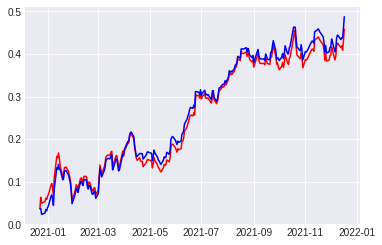

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')